In [1]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio

file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx,coords[:,2].astype(int)-1,['Y','Al','O'])

/home/zzhang/OneDrive/code/qem/qem/crystal_analyzer.py:64: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


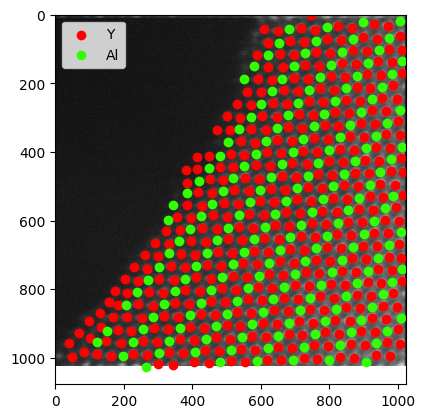

In [2]:
# %matplotlib qt
import matplotlib.pyplot as plt
crystal_analyzer.plot()

In [3]:
import numpy as np
cif_file_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4.cif'

crystal_analyzer.import_crystal_structure(cif_file_path)
crystal_analyzer.transform(np.array([[1,0,0],[0,0,1],[0,1,0]]))


In [4]:
import numpy as np
crystal_analyzer.origin = np.array([831.26558017, 962.21710935, 0])
crystal_analyzer.a = np.array([ 31.26403339, -36.73158211,0])
crystal_analyzer.b = np.array([-118.32881689, -100.67459688,0])
crystal_analyzer.c = np.array([  0.        ,   0.        , crystal_analyzer.unitcell.lattice.abc[2]])


In [5]:
# %matplotlib qt
# crystal_analyzer.choose_lattice_vectors()

array([[-7.59481678e+01, -6.46169833e+01,  0.00000000e+00,
         0.00000000e+00],
       [-4.23806491e+01, -3.60576136e+01,  0.00000000e+00,
         0.00000000e+00],
       [-1.15174269e+00, -3.26454759e+01,  1.82255000e+00,
         0.00000000e+00],
       [-8.59130408e+01, -1.04760703e+02,  1.82255000e+00,
         0.00000000e+00],
       [-4.35323918e+01, -6.87030895e+01,  1.82255000e+00,
         1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-5.91644084e+01, -5.03372984e+01,  1.82255000e+00,
         2.00000000e+00],
       [-4.35323918e+01, -6.87030895e+01,  0.00000000e+00,
         2.00000000e+00],
       [ 1.56320167e+01, -1.83657911e+01,  0.00000000e+00,
         2.00000000e+00],
       [ 2.03044554e-31, -6.07865482e-31,  1.82255000e+00,
         2.00000000e+00],
       [-9.84614085e+01, -8.37713321e+01,  0.00000000e+00,
         2.00000000e+00],
       [-1.98674084e+01, -1.69032648e+01,  0.00000000e+00,
      

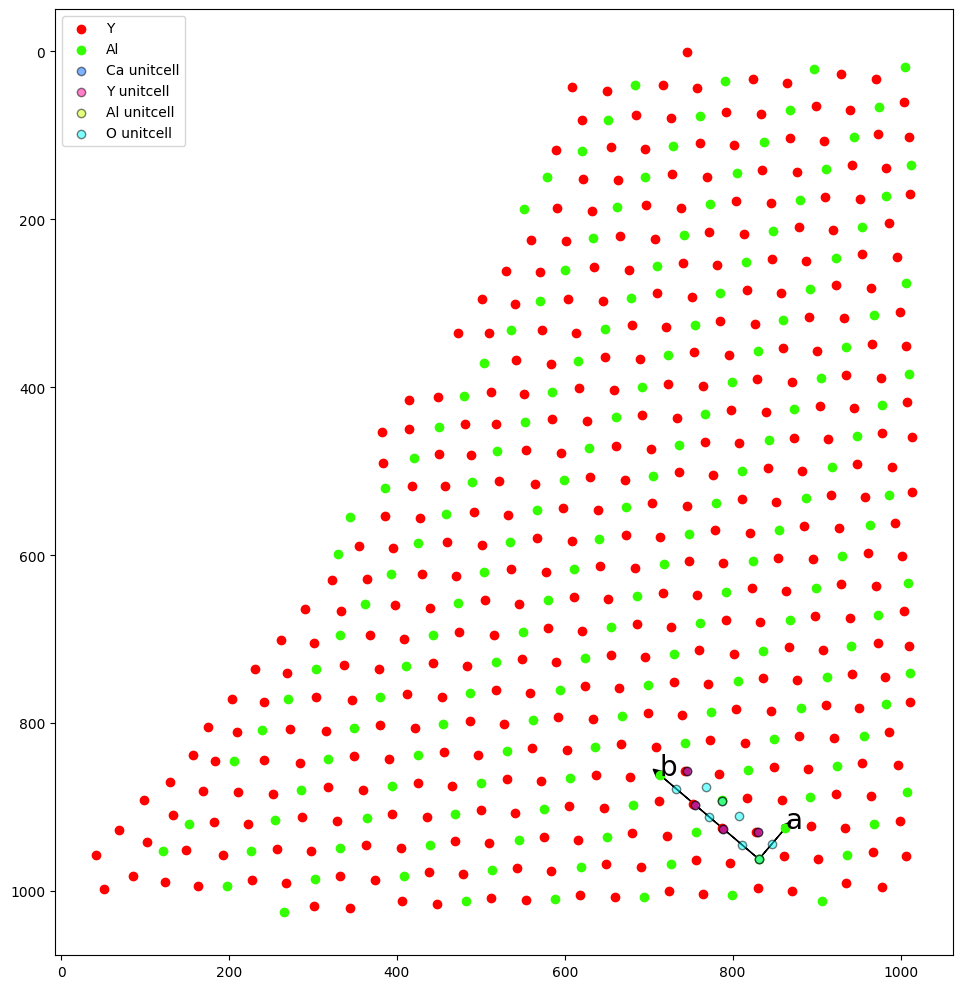

In [6]:
crystal_analyzer.unitcell_mapping()

In [7]:
crystal_analyzer.supercell_with_refined_peaks(a_limit=15,b_limit=10)
crystal_analyzer.write_lammps()

In [7]:
crystal_analyzer.write_xyz()

In [8]:
neighbor_list = crystal_analyzer.unitcell.get_neighbors(crystal_analyzer.unitcell[8], 5)
# remove the same element in the neighbour_list
neighbor_list = [neighbour for neighbour in neighbor_list if neighbour.species != crystal_analyzer.unitcell[8].species]